# Deep Learning 101

This notebook presents the basics concepts that involve the concept of Deep
Learning.

1. Linear Regression
2. **Logistic Regression**
3. Artificial Neural Networks
4. Deep Neural Networks
5. Convolutional Neural Networks

## 2. Logistic Regression

Logistic regression is a regression model where the dependent variable is
categorical, and the output can take only two values 0 or 1.
* This **probability** is modeled using a function
    * $\hat{y}=f(Wx+b)$
* We can use the **Sigmoid function** which takes any real input $\mathbf{x} \in
  \mathbb{R}$, and the logistic regression model thus predicts an output $y \in
  \{0,1\}$ 
    * $f(z) = \frac{1}{1 + \mathrm{e}^{-z}}$

### Cost function

* Log loss or Cross entropy cost
    * binary-cross-entropy
    * categorical-cross-entropy

## Logistic Regression with Keras and TensorFlow

**Activations functions** are non-linear functions applied when passing the
output of a layer to the next layer or the final

| **Keras**      | **Example**                                                         | **Link**                 |
| -------------- |:------------------------------------------------------------------: | :-----------------------:|
| **Activation functions**| sigmoid, step, tanh, softmax, ReLU | [keras.io/activations/](https://keras.io/activations/)|


## 1. Load data

#### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

np.random.seed(12049)


2023-10-16 12:08:51.469663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 12:08:51.520746: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


#### Getting the data

In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


#### Explore visual data

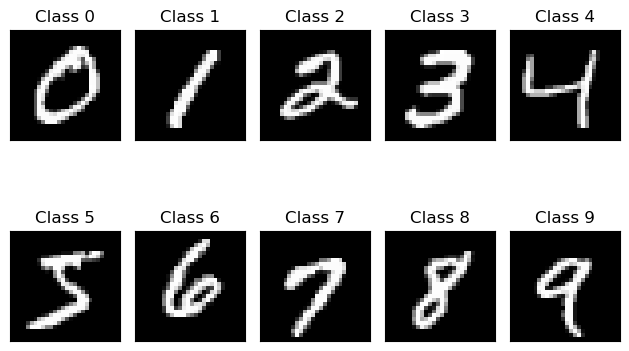

In [3]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap='gray', interpolation='none')
    plt.title("Class %d" % (i))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()


In [4]:
print('X_train.shape', X_train.shape)
print('y_train.shape', y_train.shape)
print('X_test.shape', X_test.shape)
print('y_test.shape', y_test.shape)


X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)


#### Reshaping and normalizing the inputs

In [5]:
# reshaping the inputs
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

# normalizing the inputs
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)


X_train.shape (60000, 784)
X_test.shape (10000, 784)


#### Convert class vectors to binary class matrices

In [6]:
# 10 classes
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)
print('y_train_cat shape:', y_train_cat.shape)
print('y_test_cat shape:', y_test_cat.shape)


y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## 2. Define model

In [7]:
# building a linear stack of layers with the sequential model
model = tf.keras.models.Sequential()
# Add layer
model.add(tf.keras.layers.Dense(10, input_dim=28*28, activation='softmax'))


2023-10-16 12:08:52.616481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 12:08:52.631110: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 12:08:52.631228: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-10-16 12:08:52.631828: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the

#### Model visualization

In [8]:
# plot a Keras model
tf.keras.utils.plot_model(
    model, 
    to_file='img/model02_log_reg.png',
    show_shapes=True, 
    show_layer_names=True
)

# prints a summary representation of your model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


![Logistic regression](img/model02_log_reg.png)

## 3. Compile model

In [9]:
# compiling the sequential model
model.compile(
    'rmsprop', 
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)


## 4. Fit model

In [10]:
# training the model and saving metrics in history
history = model.fit(
    X_train,
    y_train_cat,
    batch_size=256,
    epochs=50,
    verbose=2,
    validation_data=(X_test, y_test_cat),
)


Epoch 1/50


2023-10-16 12:08:53.110865: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


235/235 - 0s - loss: 0.7670 - categorical_accuracy: 0.8130 - val_loss: 0.3976 - val_categorical_accuracy: 0.8968 - 473ms/epoch - 2ms/step
Epoch 2/50
235/235 - 0s - loss: 0.3695 - categorical_accuracy: 0.8993 - val_loss: 0.3258 - val_categorical_accuracy: 0.9093 - 245ms/epoch - 1ms/step
Epoch 3/50
235/235 - 0s - loss: 0.3230 - categorical_accuracy: 0.9098 - val_loss: 0.3014 - val_categorical_accuracy: 0.9158 - 242ms/epoch - 1ms/step
Epoch 4/50
235/235 - 0s - loss: 0.3033 - categorical_accuracy: 0.9158 - val_loss: 0.2877 - val_categorical_accuracy: 0.9192 - 236ms/epoch - 1ms/step
Epoch 5/50
235/235 - 0s - loss: 0.2920 - categorical_accuracy: 0.9185 - val_loss: 0.2815 - val_categorical_accuracy: 0.9208 - 228ms/epoch - 970us/step
Epoch 6/50
235/235 - 0s - loss: 0.2841 - categorical_accuracy: 0.9209 - val_loss: 0.2777 - val_categorical_accuracy: 0.9228 - 240ms/epoch - 1ms/step
Epoch 7/50
235/235 - 0s - loss: 0.2783 - categorical_accuracy: 0.9225 - val_loss: 0.2733 - val_categorical_accuracy

## 5. Evaluate model

In [11]:
history.history.keys()


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

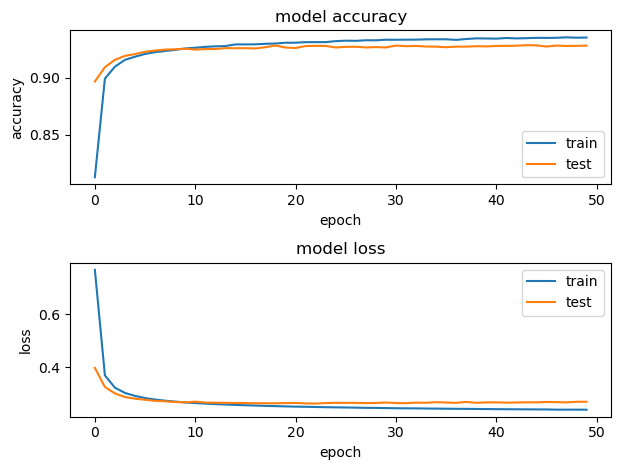

In [12]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


In [13]:
# evaluate model on test data
[test_loss, test_acc] = model.evaluate(X_test, y_test_cat)
print(
    "Evaluation result on Test Data:\nLoss = {}\nAccuracy = {}".format(
        test_loss, test_acc
    )
)


313/313 [==============================] - 0s 687us/step - loss: 0.2702 - categorical_accuracy: 0.9282
Evaluation result on Test Data:
Loss = 0.270211398601532
Accuracy = 0.9282000064849854


## References

* [Deep Learning Book](http://www.deeplearningbook.org)

* [Zero to Deep Learning™ Udemy Video Course](https://github.com/dataweekends/zero_to_deep_learning_udemy)

* [THE MNIST DATABASE](http://yann.lecun.com/exdb/mnist/)